# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn import linear_model

In [56]:
# Your code here.
x_values = [17, 52, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

student_data = pd.DataFrame({"Students_Age": x_values, "Tardies": y_values})



Draw a dispersion diagram (scatter plot) for the data.

In [57]:
# Your code here."
px.scatter(student_data, x="Students_Age", y="Tardies")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [58]:
# Your response here. 

#There is a negative relation between the age and the number. of tardies, meaning that 
# the older the student, he/she is less likely to get a tardie

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [59]:
# Your response here.
#correlation:

correl_stud_tard = np.corrcoef(x_values, y_values)[0, 1]

print("Correlation:", correl_stud_tard)

#covariance:

x_values_mean = sum(x_values) / len(x_values)
y_values_mean = sum(y_values) / len(y_values)
cov_stud_tard = sum([(x - x_values_mean) * (y - y_values_mean) for x, y in zip(x_values, y_values)])

print("Correlation:", cov_stud_tard)


Correlation: -0.937849118329136
Correlation: -413.99999999999994


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [60]:
# Your response here.
model = linear_model.LinearRegression()
x = student_data[["Students_Age"]]
y = student_data["Tardies"]
result = model.fit(x, y)
print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_[0])

regression_line = result.intercept_ + student_data.Students_Age * result.coef_[0]

#Linear regression and the Tardies are the outcome variable. 

Intercept: 12.815411355735804
Coefficient: -0.23986095017381223


Plot your regression model on your scatter plot.

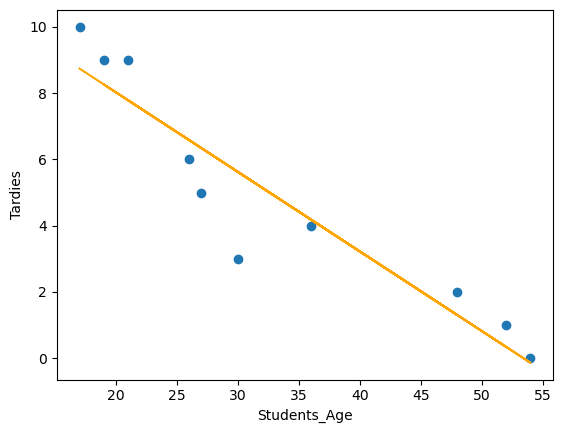

In [61]:
# Your code here.

plt.plot(student_data.Students_Age, regression_line, c="orange")
plt.scatter(x=student_data.Students_Age, y=student_data.Tardies)
plt.xlabel("Students_Age")
plt.ylabel("Tardies")
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [62]:
# Your response here. 

#we can say that there is a strong relation between the two variables and, in this case, the model works. i would not use this to 
#predict future tardies because it could be a number of other factors behind. If we keep getting the same relation between age 
# and tardies in other data sets/bootcamps, we can say that age is a good predictor. Not right now.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [63]:
# Import any libraries you may need & the data

vehicles = pd.read_csv("vehicles.csv")

vehicles_db = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
vehicles_db.dropna()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<Axes: >

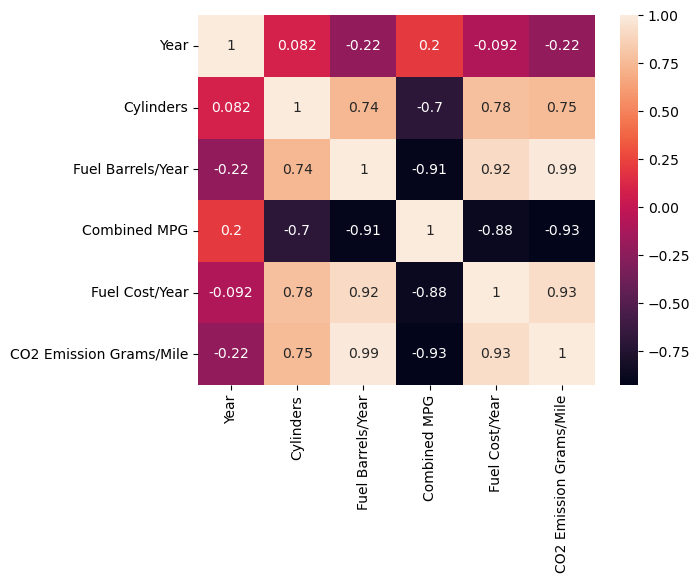

In [64]:
# Your response here. 

sns.heatmap(vehicles_db.corr(), annot=True)

#Fuel Barrels/Year would give is the most important. 

#Year would be the least relevant. We could use combined MPG to get info on COs Emissions.


In [65]:

corr_matrix = vehicles_db.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

#found this but heatmap is mutch easy.


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,NaN,0.082469,0.221084,0.204751,0.091913,0.222300
Cylinders,NaN,NaN,0.739517,0.698648,0.778153,0.752393
Fuel Barrels/Year,NaN,NaN,NaN,0.909743,0.916208,0.986189
Combined MPG,NaN,NaN,NaN,NaN,0.875185,0.926229
Fuel Cost/Year,NaN,NaN,NaN,NaN,NaN,0.930865
CO2 Emission Grams/Mile,NaN,NaN,NaN,NaN,NaN,NaN


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [66]:
# Your response here. 

#Regression Line. 


vehicles_db.rename(columns={"Fuel Barrels/Year": "fuel_b_year"}, inplace=True)
vehicles_db.rename(columns={"CO2 Emission Grams/Mile": "co2_mile"}, inplace=True)



model_2 = linear_model.LinearRegression()
x = vehicles_db[["fuel_b_year"]]
y = vehicles_db["co2_mile"]
result = model.fit(x, y)
print("Intercept:", result.intercept_)
print("Coefficient:", result.coef_[0])



Intercept: 12.486520830756717
Coefficient: 26.283625397470292


/var/folders/n7/qn8s75510p5chs7mw2tvcgy80000gp/T/ipykernel_4985/2806879875.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/n7/qn8s75510p5chs7mw2tvcgy80000gp/T/ipykernel_4985/2806879875.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
regression_line_2 = result.intercept_ + vehicles_db.fuel_b_year * result.coef_[0]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

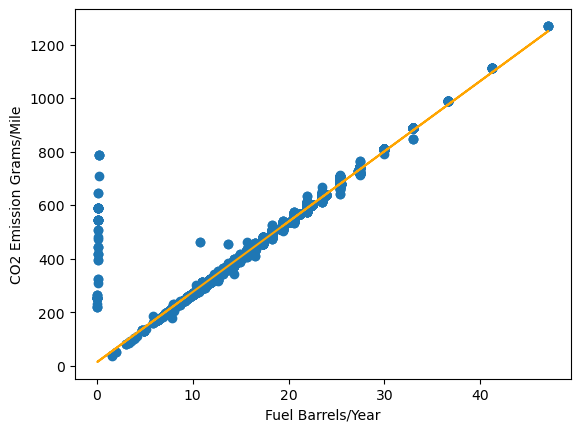

In [68]:
# Your response here. 

plt.plot(vehicles_db.fuel_b_year, regression_line_2, c="orange")
plt.scatter(x=vehicles_db.fuel_b_year, y=vehicles_db.co2_mile)
plt.xlabel("Fuel Barrels/Year")
plt.ylabel("CO2 Emission Grams/Mile")
plt.show()

#we can conclude that we can predict the co2 emissions based on the fuel barrels burned/year. we have outliers in the lower values 
#of fuel barrels, but this can mean that we have a few number of cars that may be old and are collector cars. they burn few barrels 
#of fuel because they only do a few milles, but they pollut alot.


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [69]:
# Your code here.


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [70]:
# Your code here.


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [71]:
# Your response here. 


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [72]:
# Your response here. 


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [73]:
# Your response here. 
